In [2]:
import rishi_utils as ru
from rdkit import Chem
import fall20_mse_8803 as retro
import importlib
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
importlib.reload(retro)
importlib.reload(ru)
import numpy as np
import pickle
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 600
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


# Test solubility

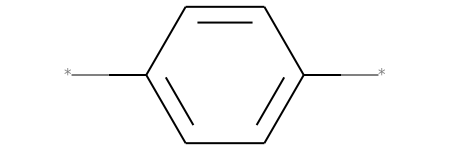

In [8]:
mol = Chem.MolFromSmiles('[*]c1ccc([*])cc1')
mol

In [17]:
type(Chem.MolFromSmarts('[R0]'))

rdkit.Chem.rdchem.Mol

In [18]:
mol.GetSubstructMatches(Chem.MolFromSmarts('[R0]'))

((0,), (5,))

In [20]:
importlib.reload(ru)
ru.is_soluble(mol) #should be False

False

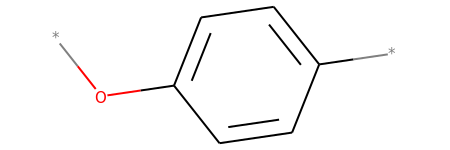

In [3]:
mol2 = Chem.MolFromSmiles('[*]Oc1ccc([*])cc1')
mol2

In [21]:
ru.is_soluble(mol2) #should be True

True

In [22]:
'dep' in 'depol'

True

# Test synthetic score

In [ ]:
with open('/data/rgur/retrosynthesis/molecule_lookup/mol_set.pkl','rb') as f:
    mol_set = pickle.load(f)

In [24]:
Chem.MolToSmiles(mol)

'*c1ccc(*)cc1'

In [52]:
importlib.reload(retro)
paths = retro.retrosynthesize([Chem.MolToSmiles(mol)])
paths

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
#######
*c1ccc(*)cc1
<function ring_close_retro at 0x7f69e0236730>
inner_RxnPaths len: 0
<function func_chain_retro at 0x7f69e0236378>
inner_RxnPaths len: 0
<function hydrogenate_chain at 0x7f69e156a268>
inner_RxnPaths len: 0
<function elim_retro at 0x7f69e0236bf8>
inner_RxnPaths len: 6
sm_RxnPaths len: 7


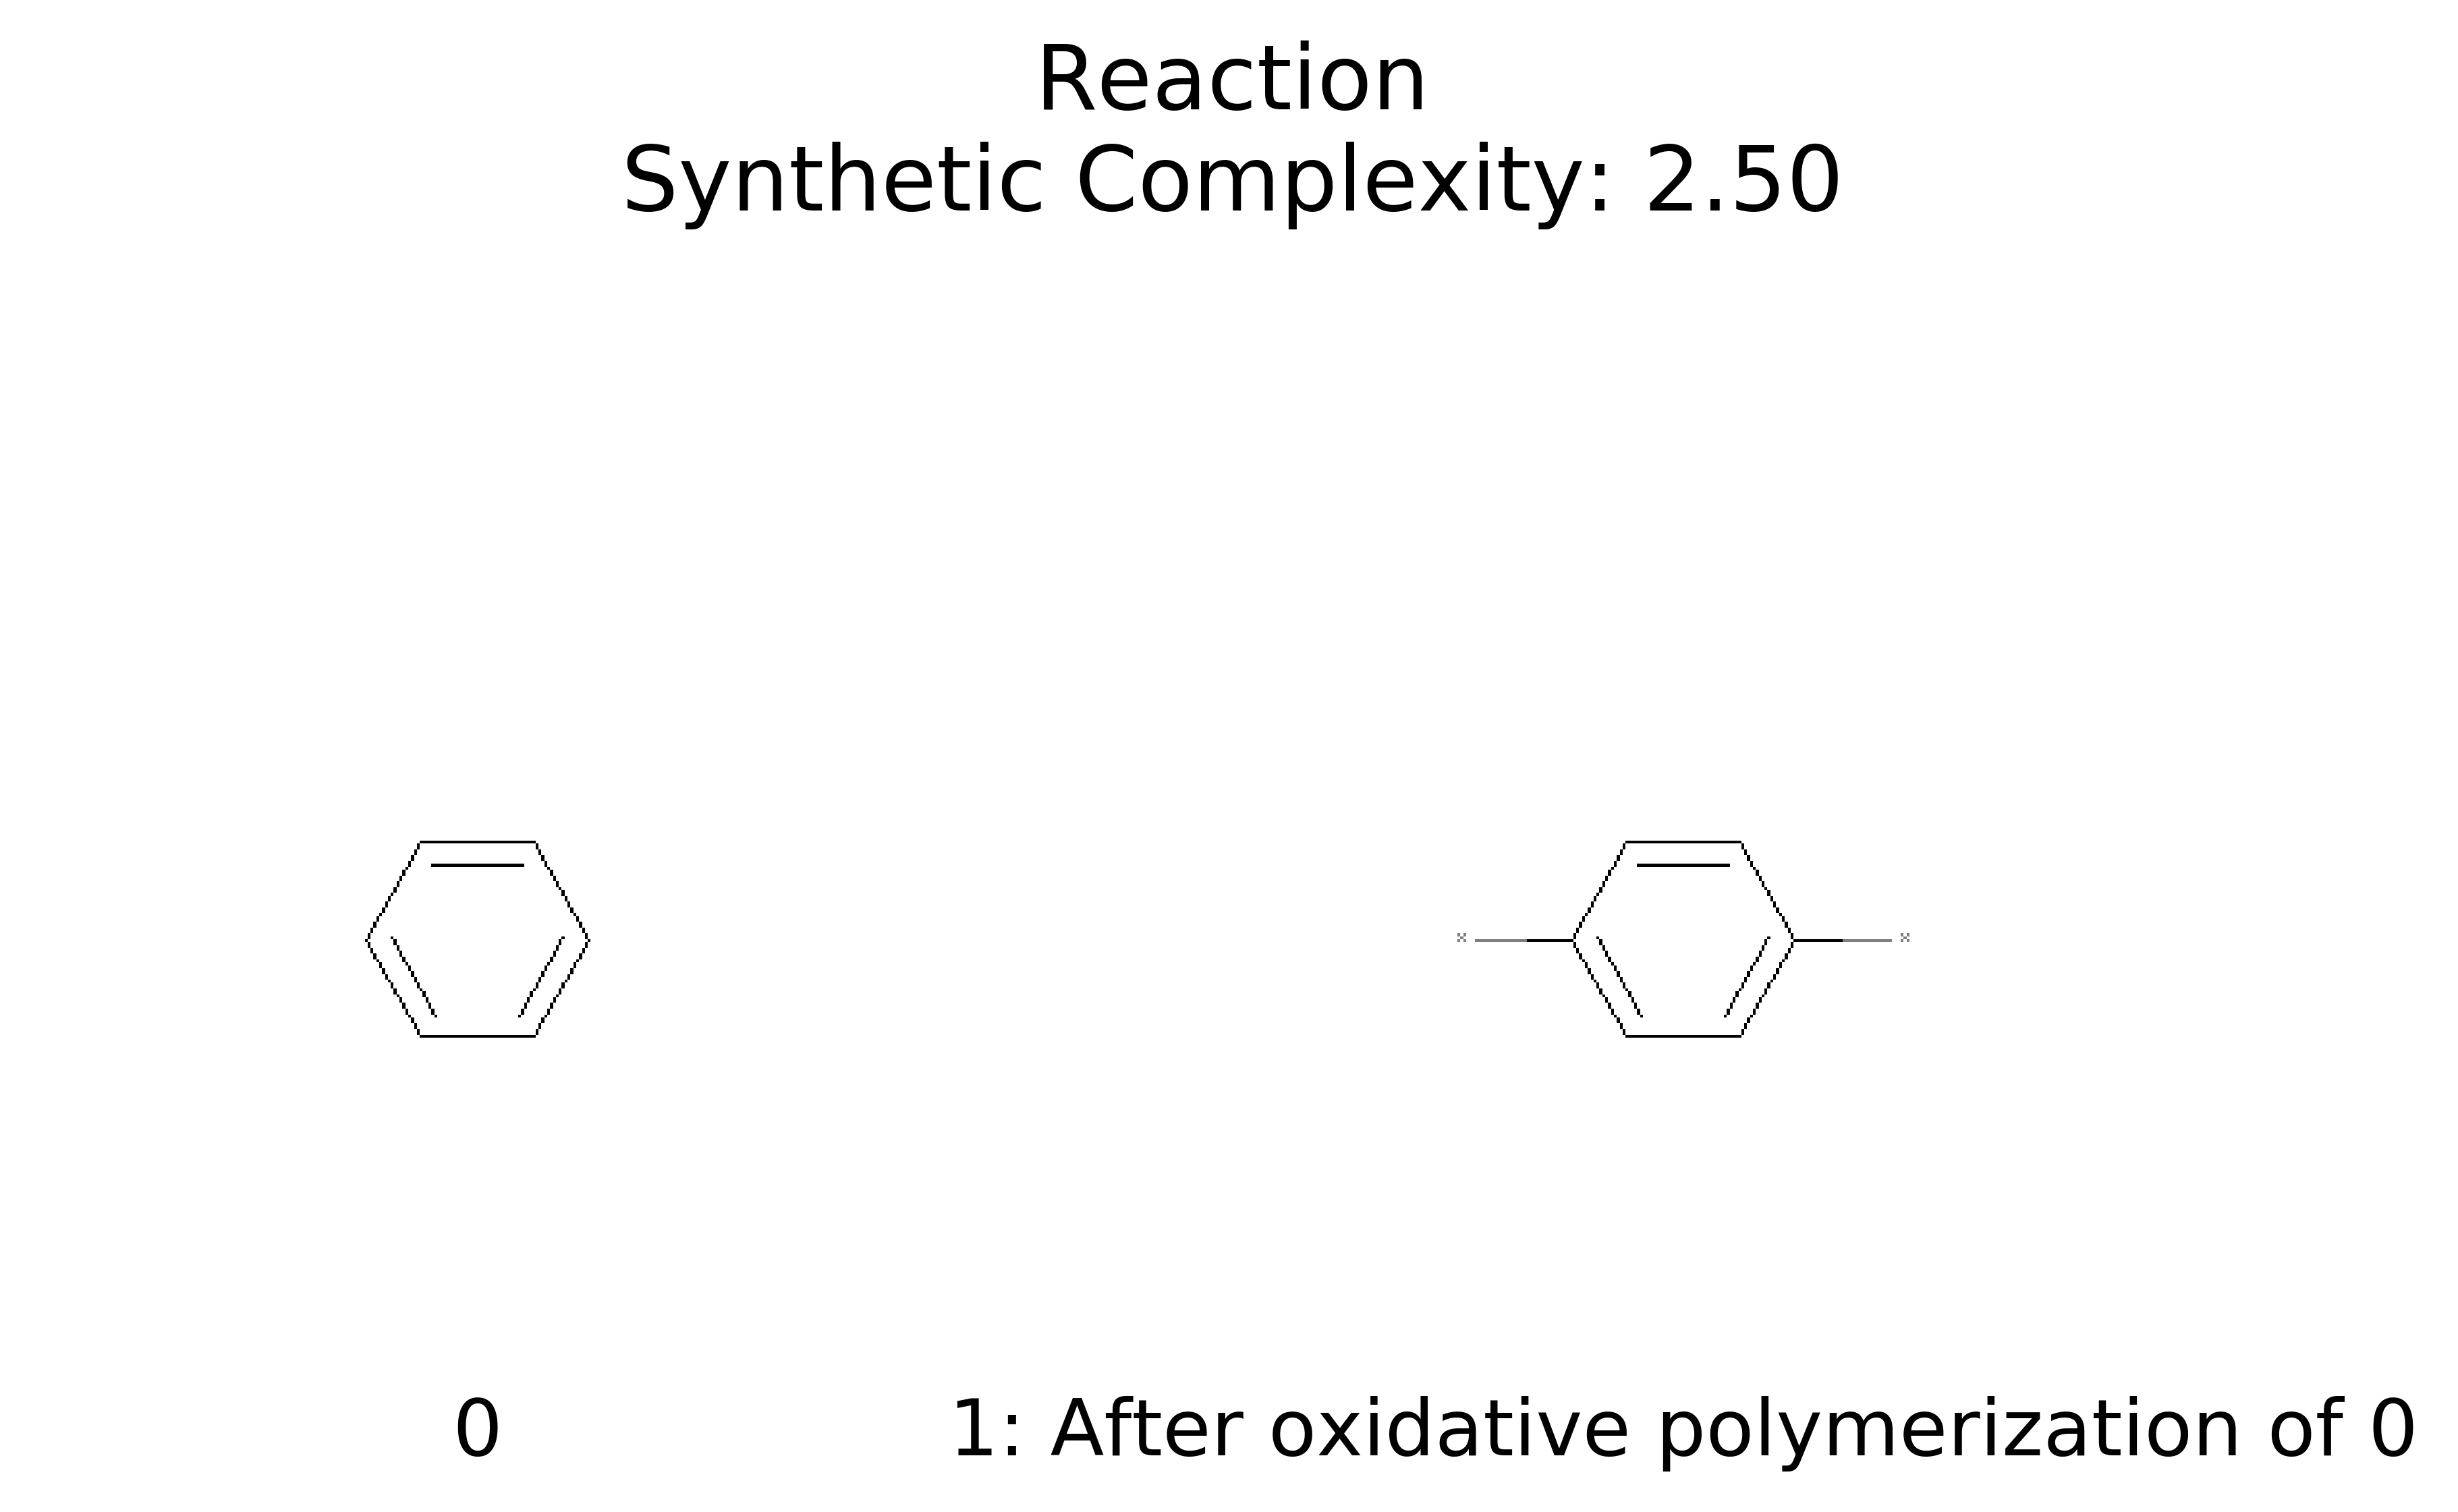

In [53]:
paths[0].SearchReactants(mol_set)
paths[0].SyntheticScore()
paths[0].DrawSteps()

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


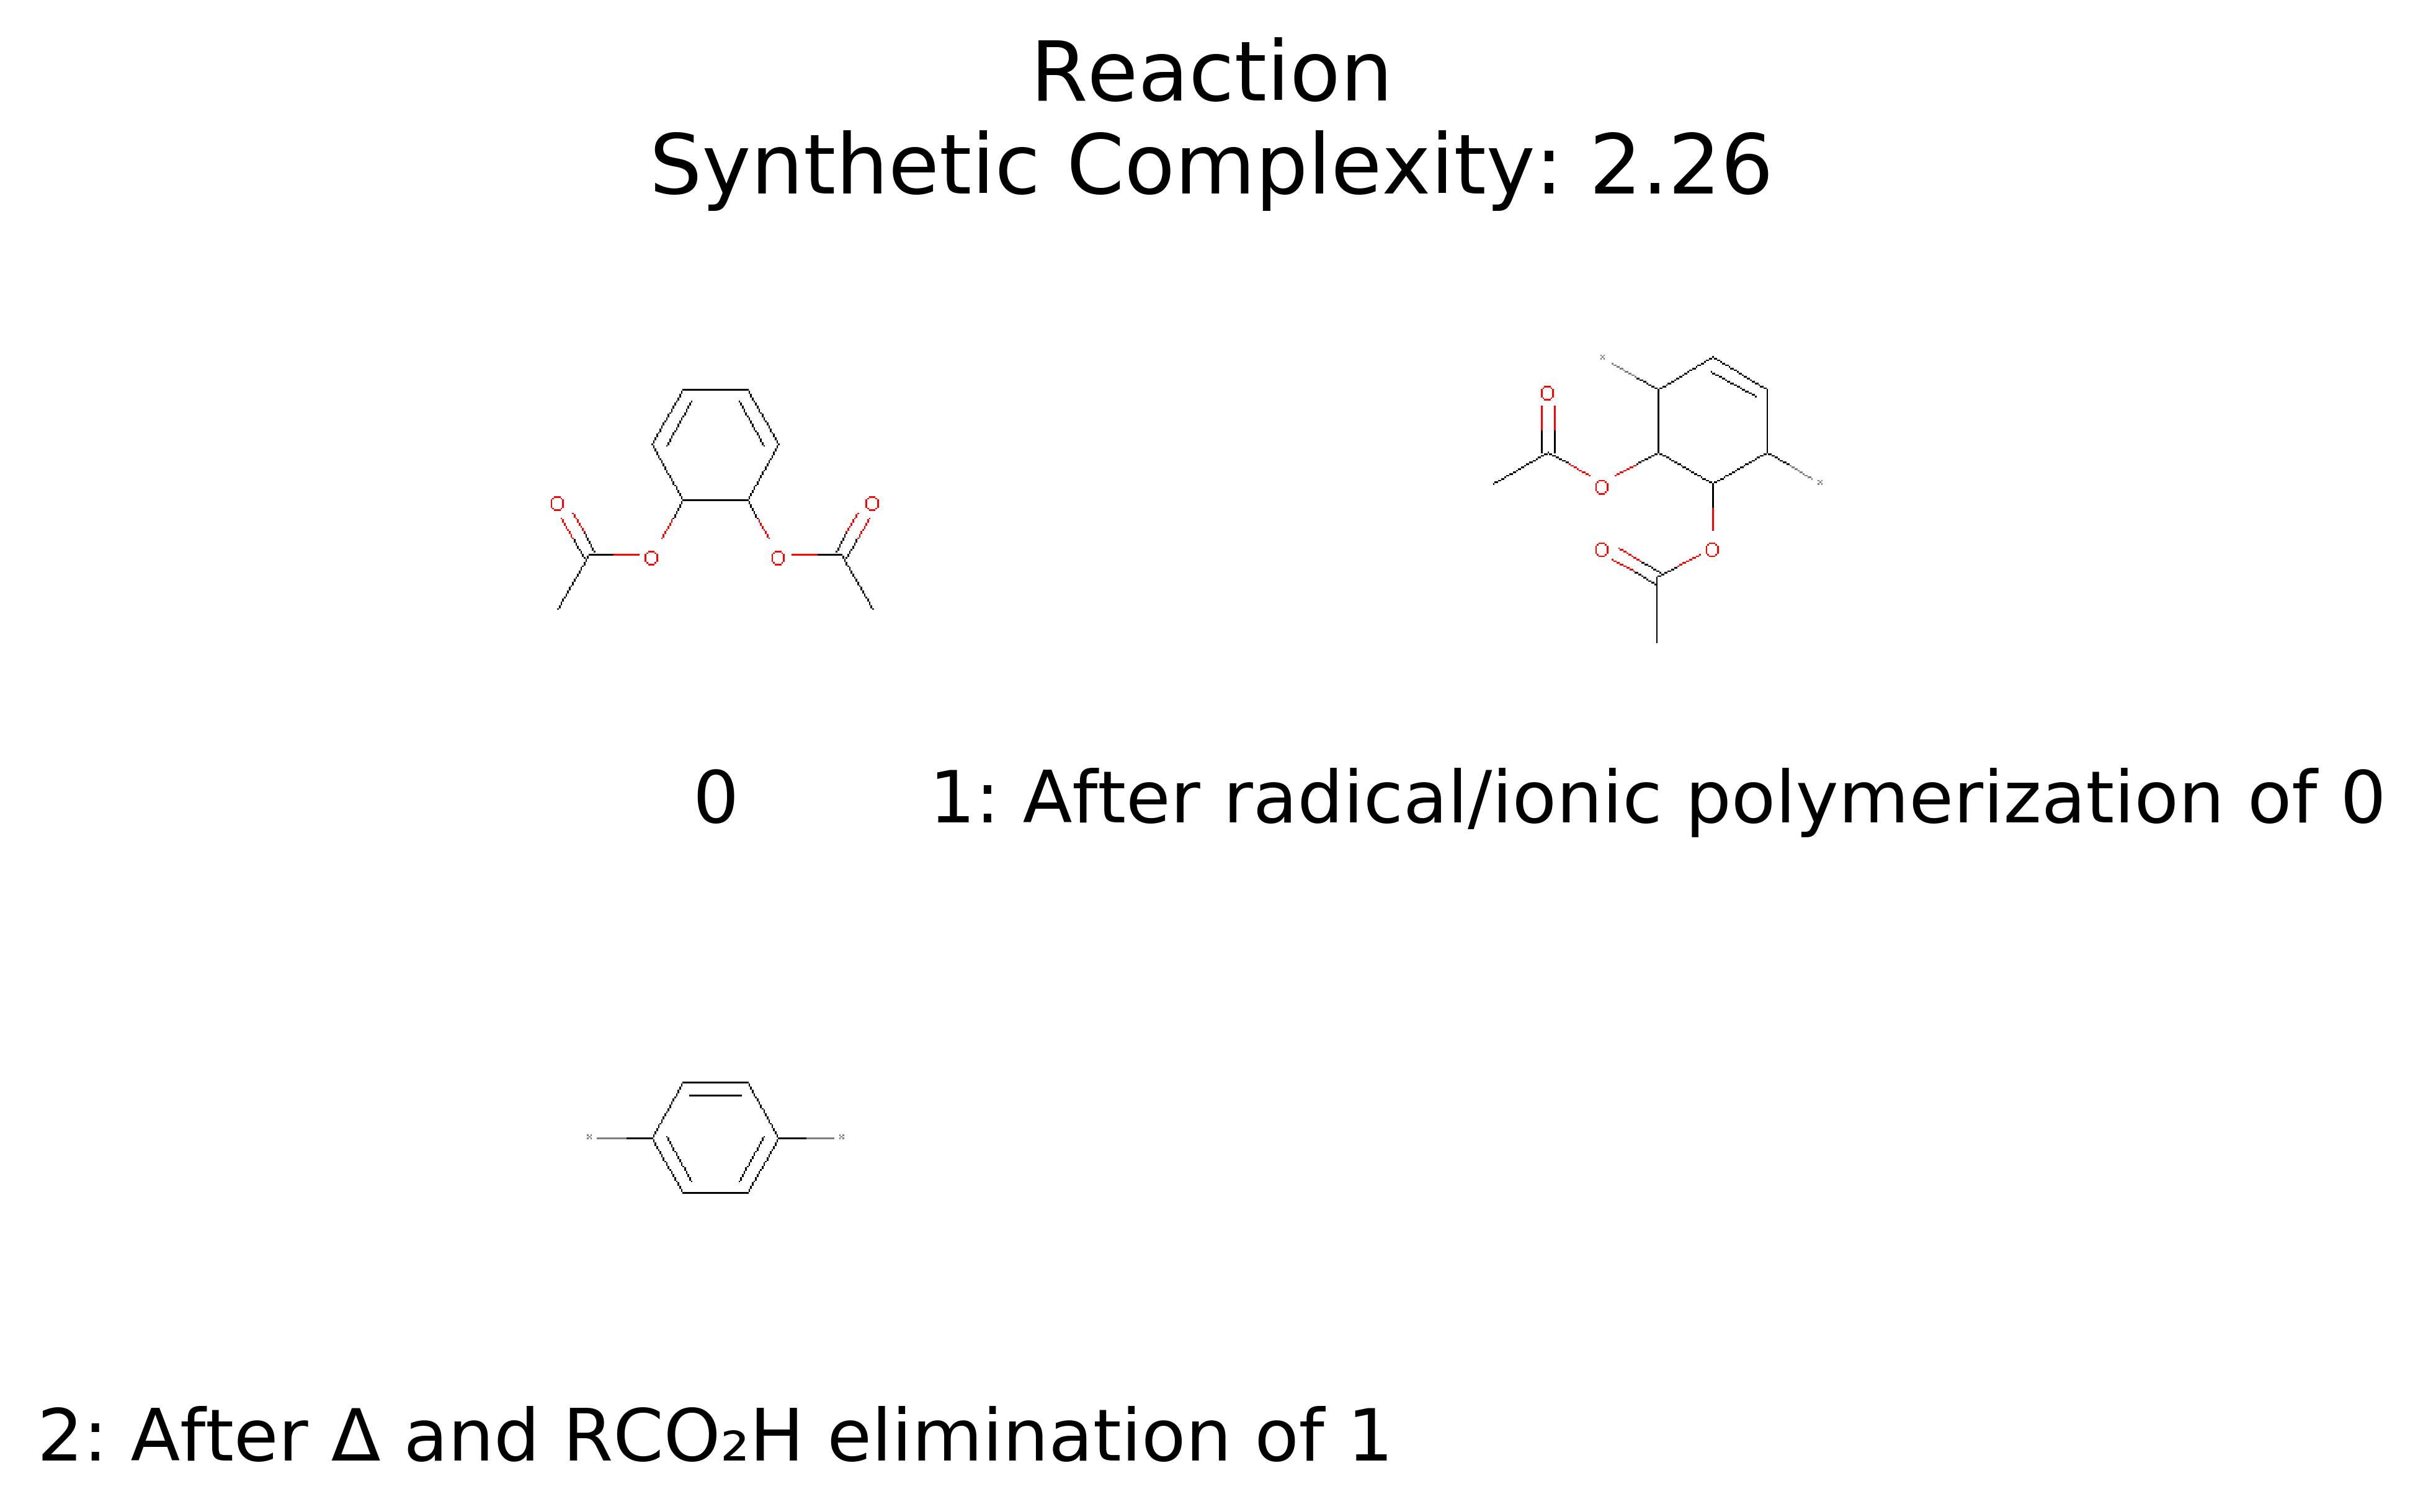

In [55]:
importlib.reload(retro)
paths[1].SearchReactants(mol_set)
paths[1].SyntheticScore()
paths[1].DrawSteps()

# Test SO2 oxidation

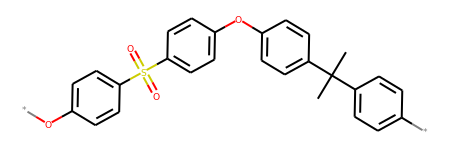

In [3]:
mol = Chem.MolFromSmiles('[*]Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C(C)(C)c4ccc([*])cc4)cc3)cc2)cc1')
mol

In [10]:
lp = ru.LinearPol(mol)

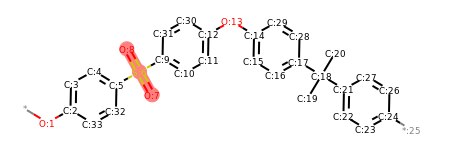

In [19]:
ru.mol_with_atom_index(lp.mol)

In [20]:
matches = lp.mol.GetSubstructMatches(Chem.MolFromSmiles('S(=O)(=O)'))
matches

((6, 7, 8),)

In [28]:
match_combo = matches

In [29]:
o_inds = []
for match in match_combo:
    o_inds.append(match[1])
    o_inds.append(match[2])
o_inds = sorted(o_inds,reverse=True)
o_inds

[8, 7]

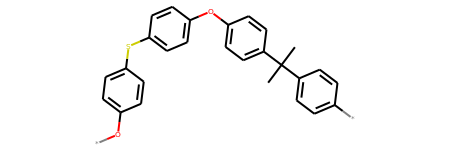

In [30]:
# for x in s_inds:
#     lp.mol.GetAtomWithIdx(x).SetIsAromatic(False)
em = Chem.EditableMol(lp.mol)
[em.RemoveAtom(x) for x in o_inds]
new_mol = em.GetMol()
Chem.SanitizeMol(new_mol)
ru.mol_without_atom_index(new_mol


# Test SO2 oxidation

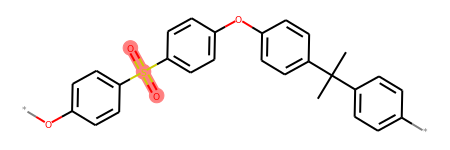

In [40]:
mol

In [45]:
importlib.reload(retro)
ru.mol_without_atom_index(mol)
out=retro.func_chain_retro(mol,'SO2_oxidation')
out

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


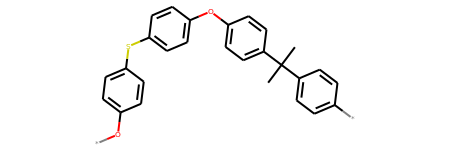

In [46]:
out[0]

# Fix overflow error

In [2]:
sm_ls = []
with open('/data/rgur/g2g/spiro_vol/incomplete_run2/SR1/resultsList_09_10PM_on_January_20_2021.txt','r') as f:
    for line in f:
        sm_ls.append( line.strip() )

In [63]:
importlib.reload(retro)
importlib.reload(ru)
out = retro.retrosynthesize(sm_ls[0:100],n_core=5,hydrogenate_chain=False,debug=True)

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


In [64]:
len(out)

34

In [65]:
for x in out:
    x.GetLP()

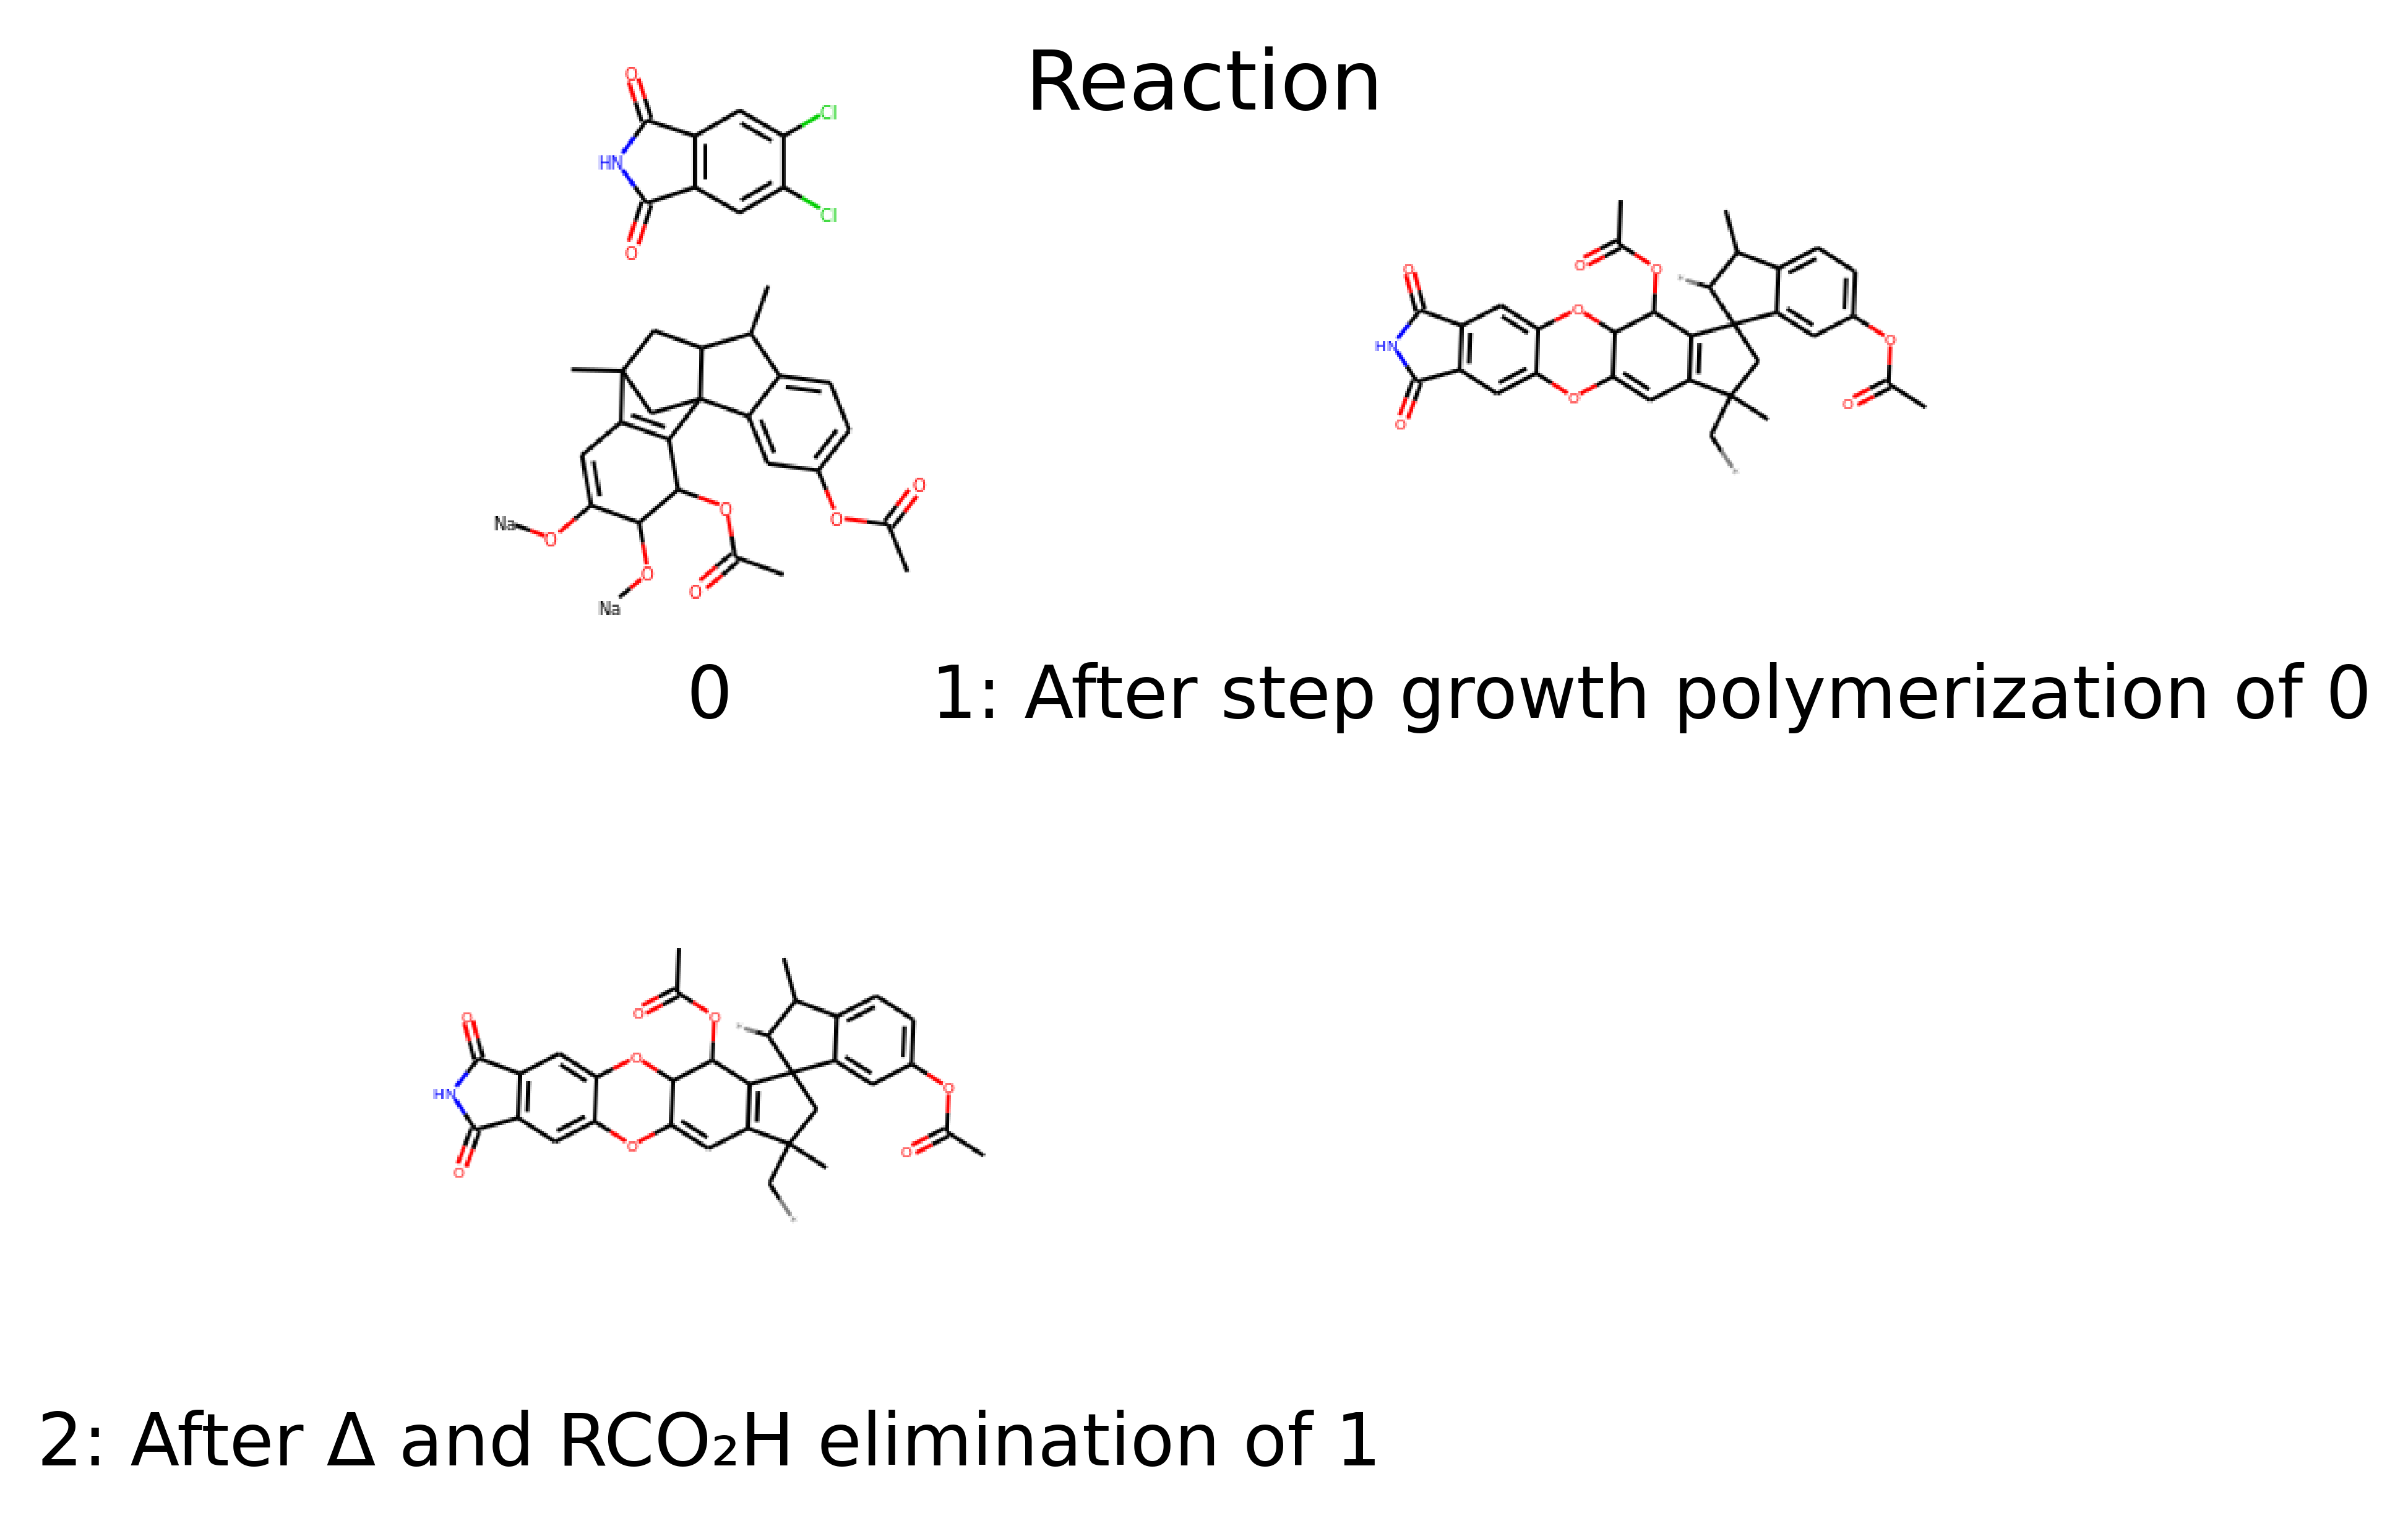

In [66]:
out[0].DrawSteps()

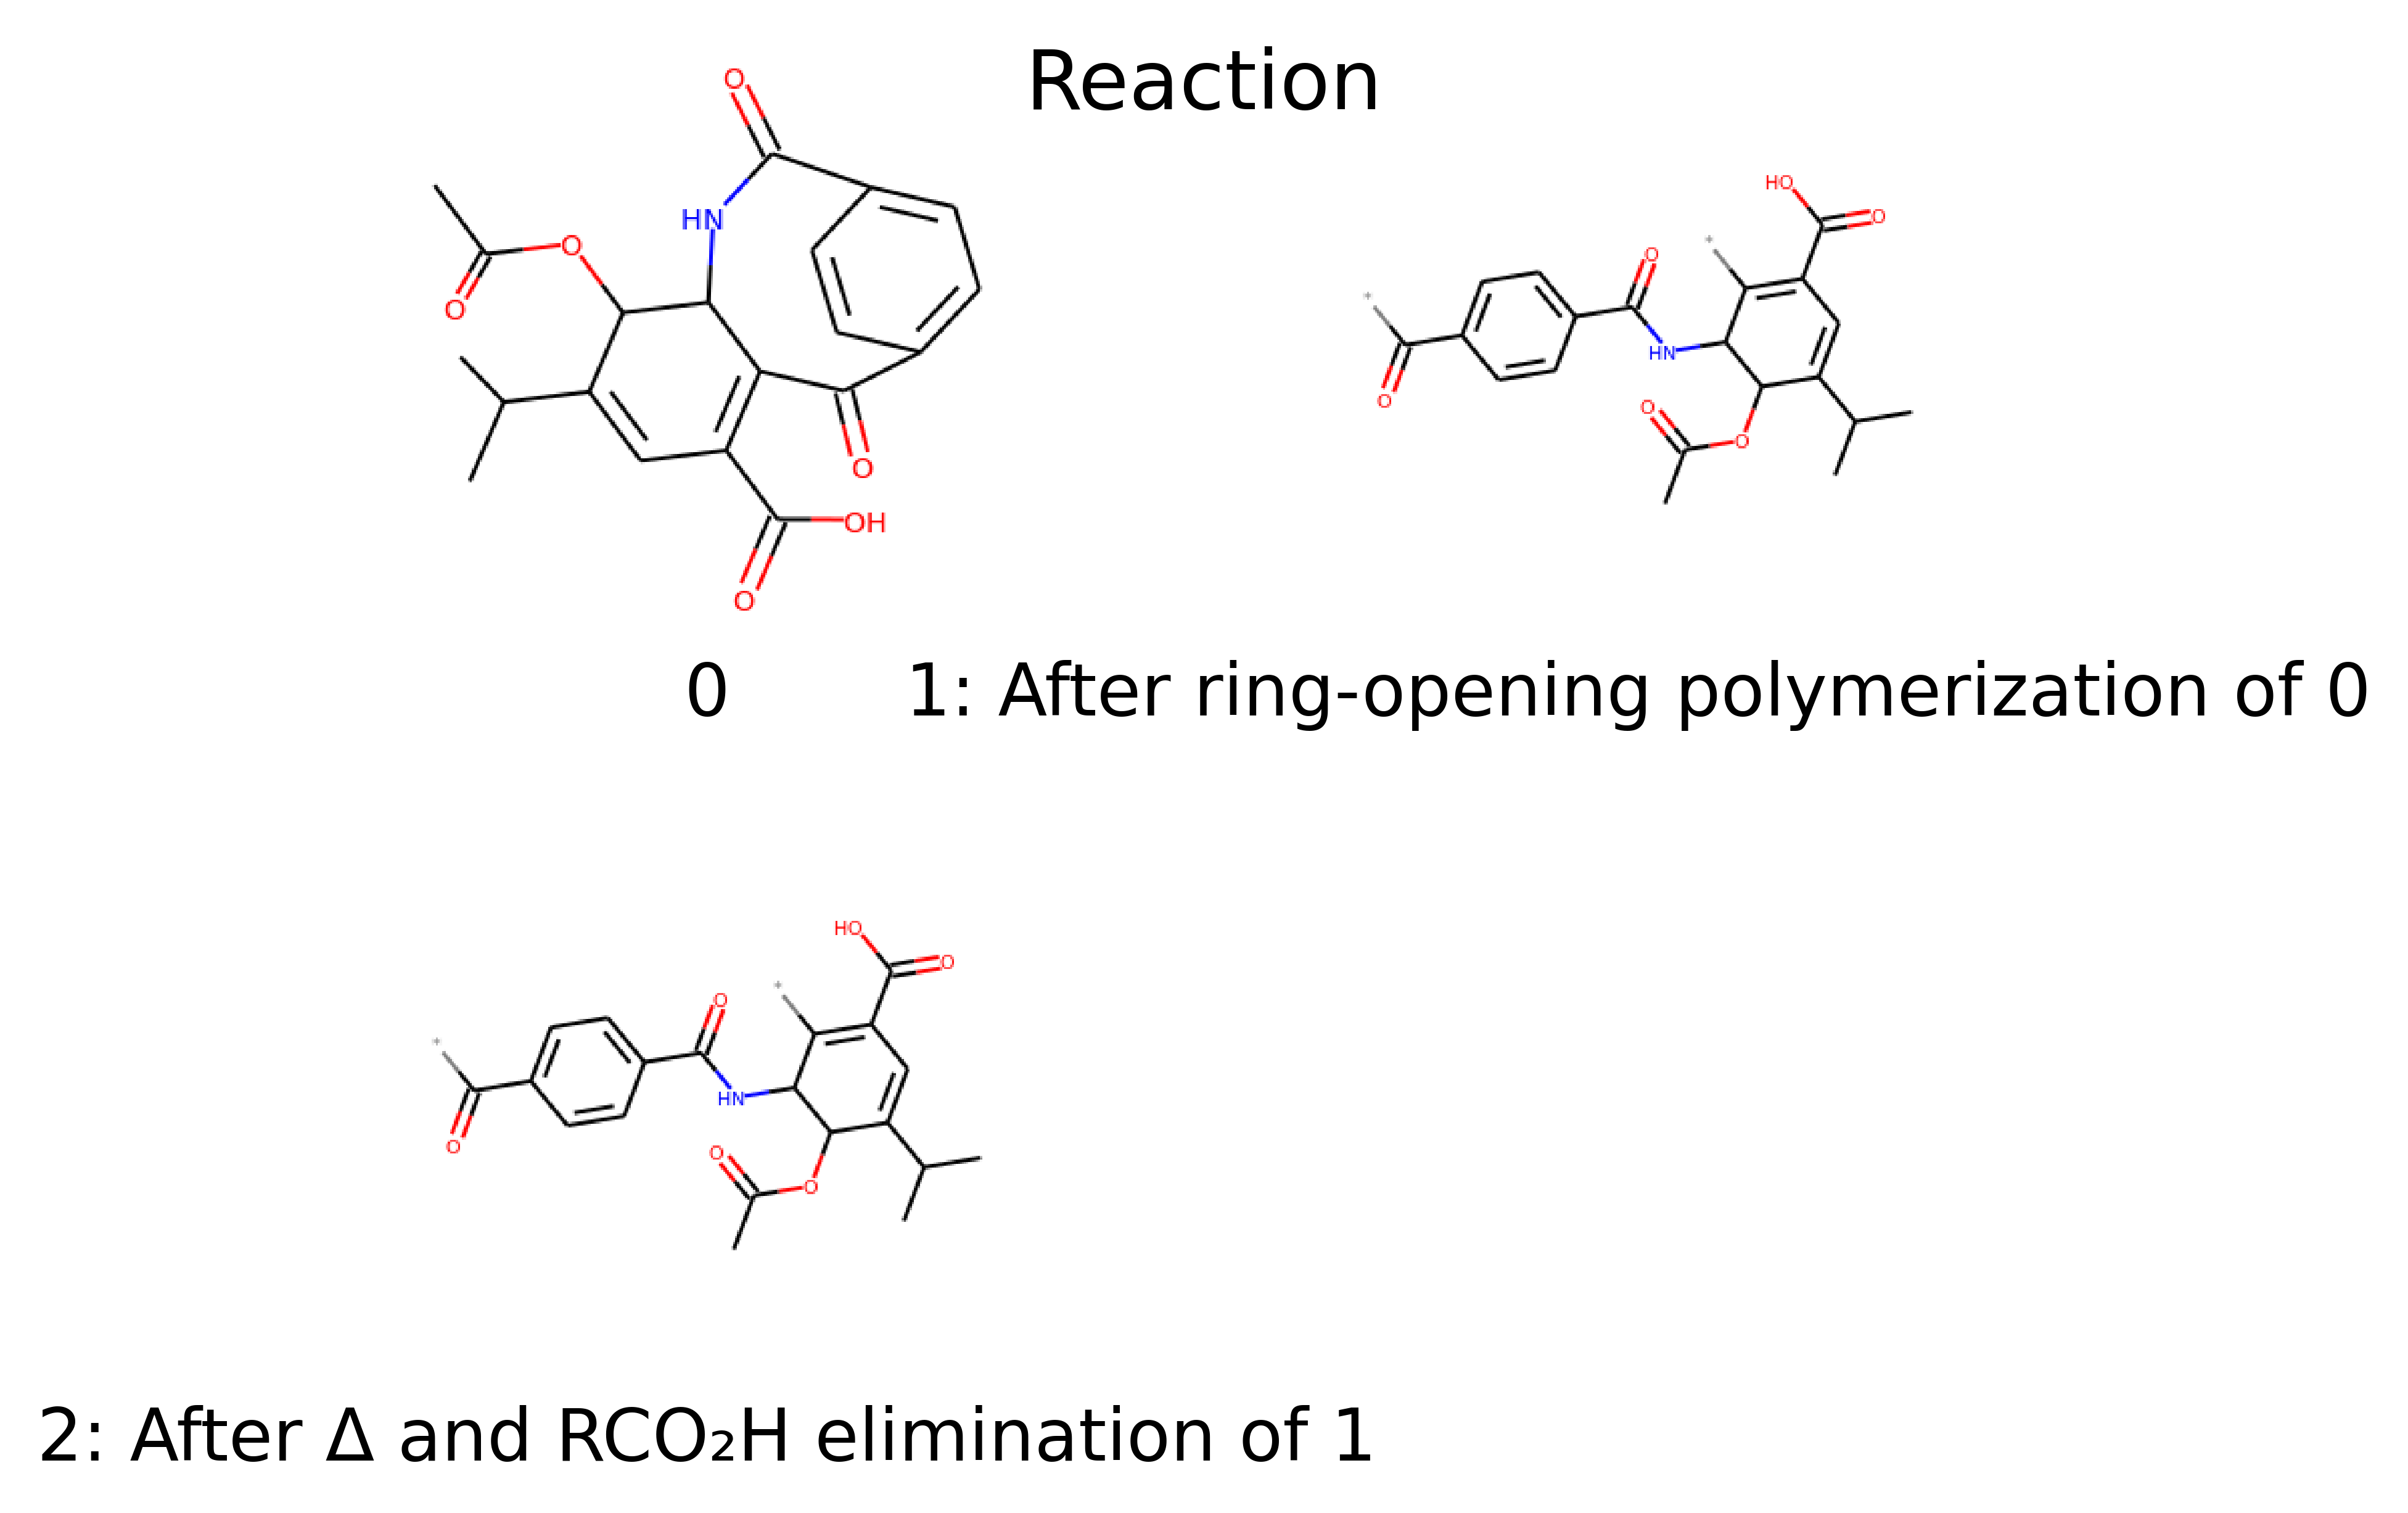

In [67]:
out[1].DrawSteps()

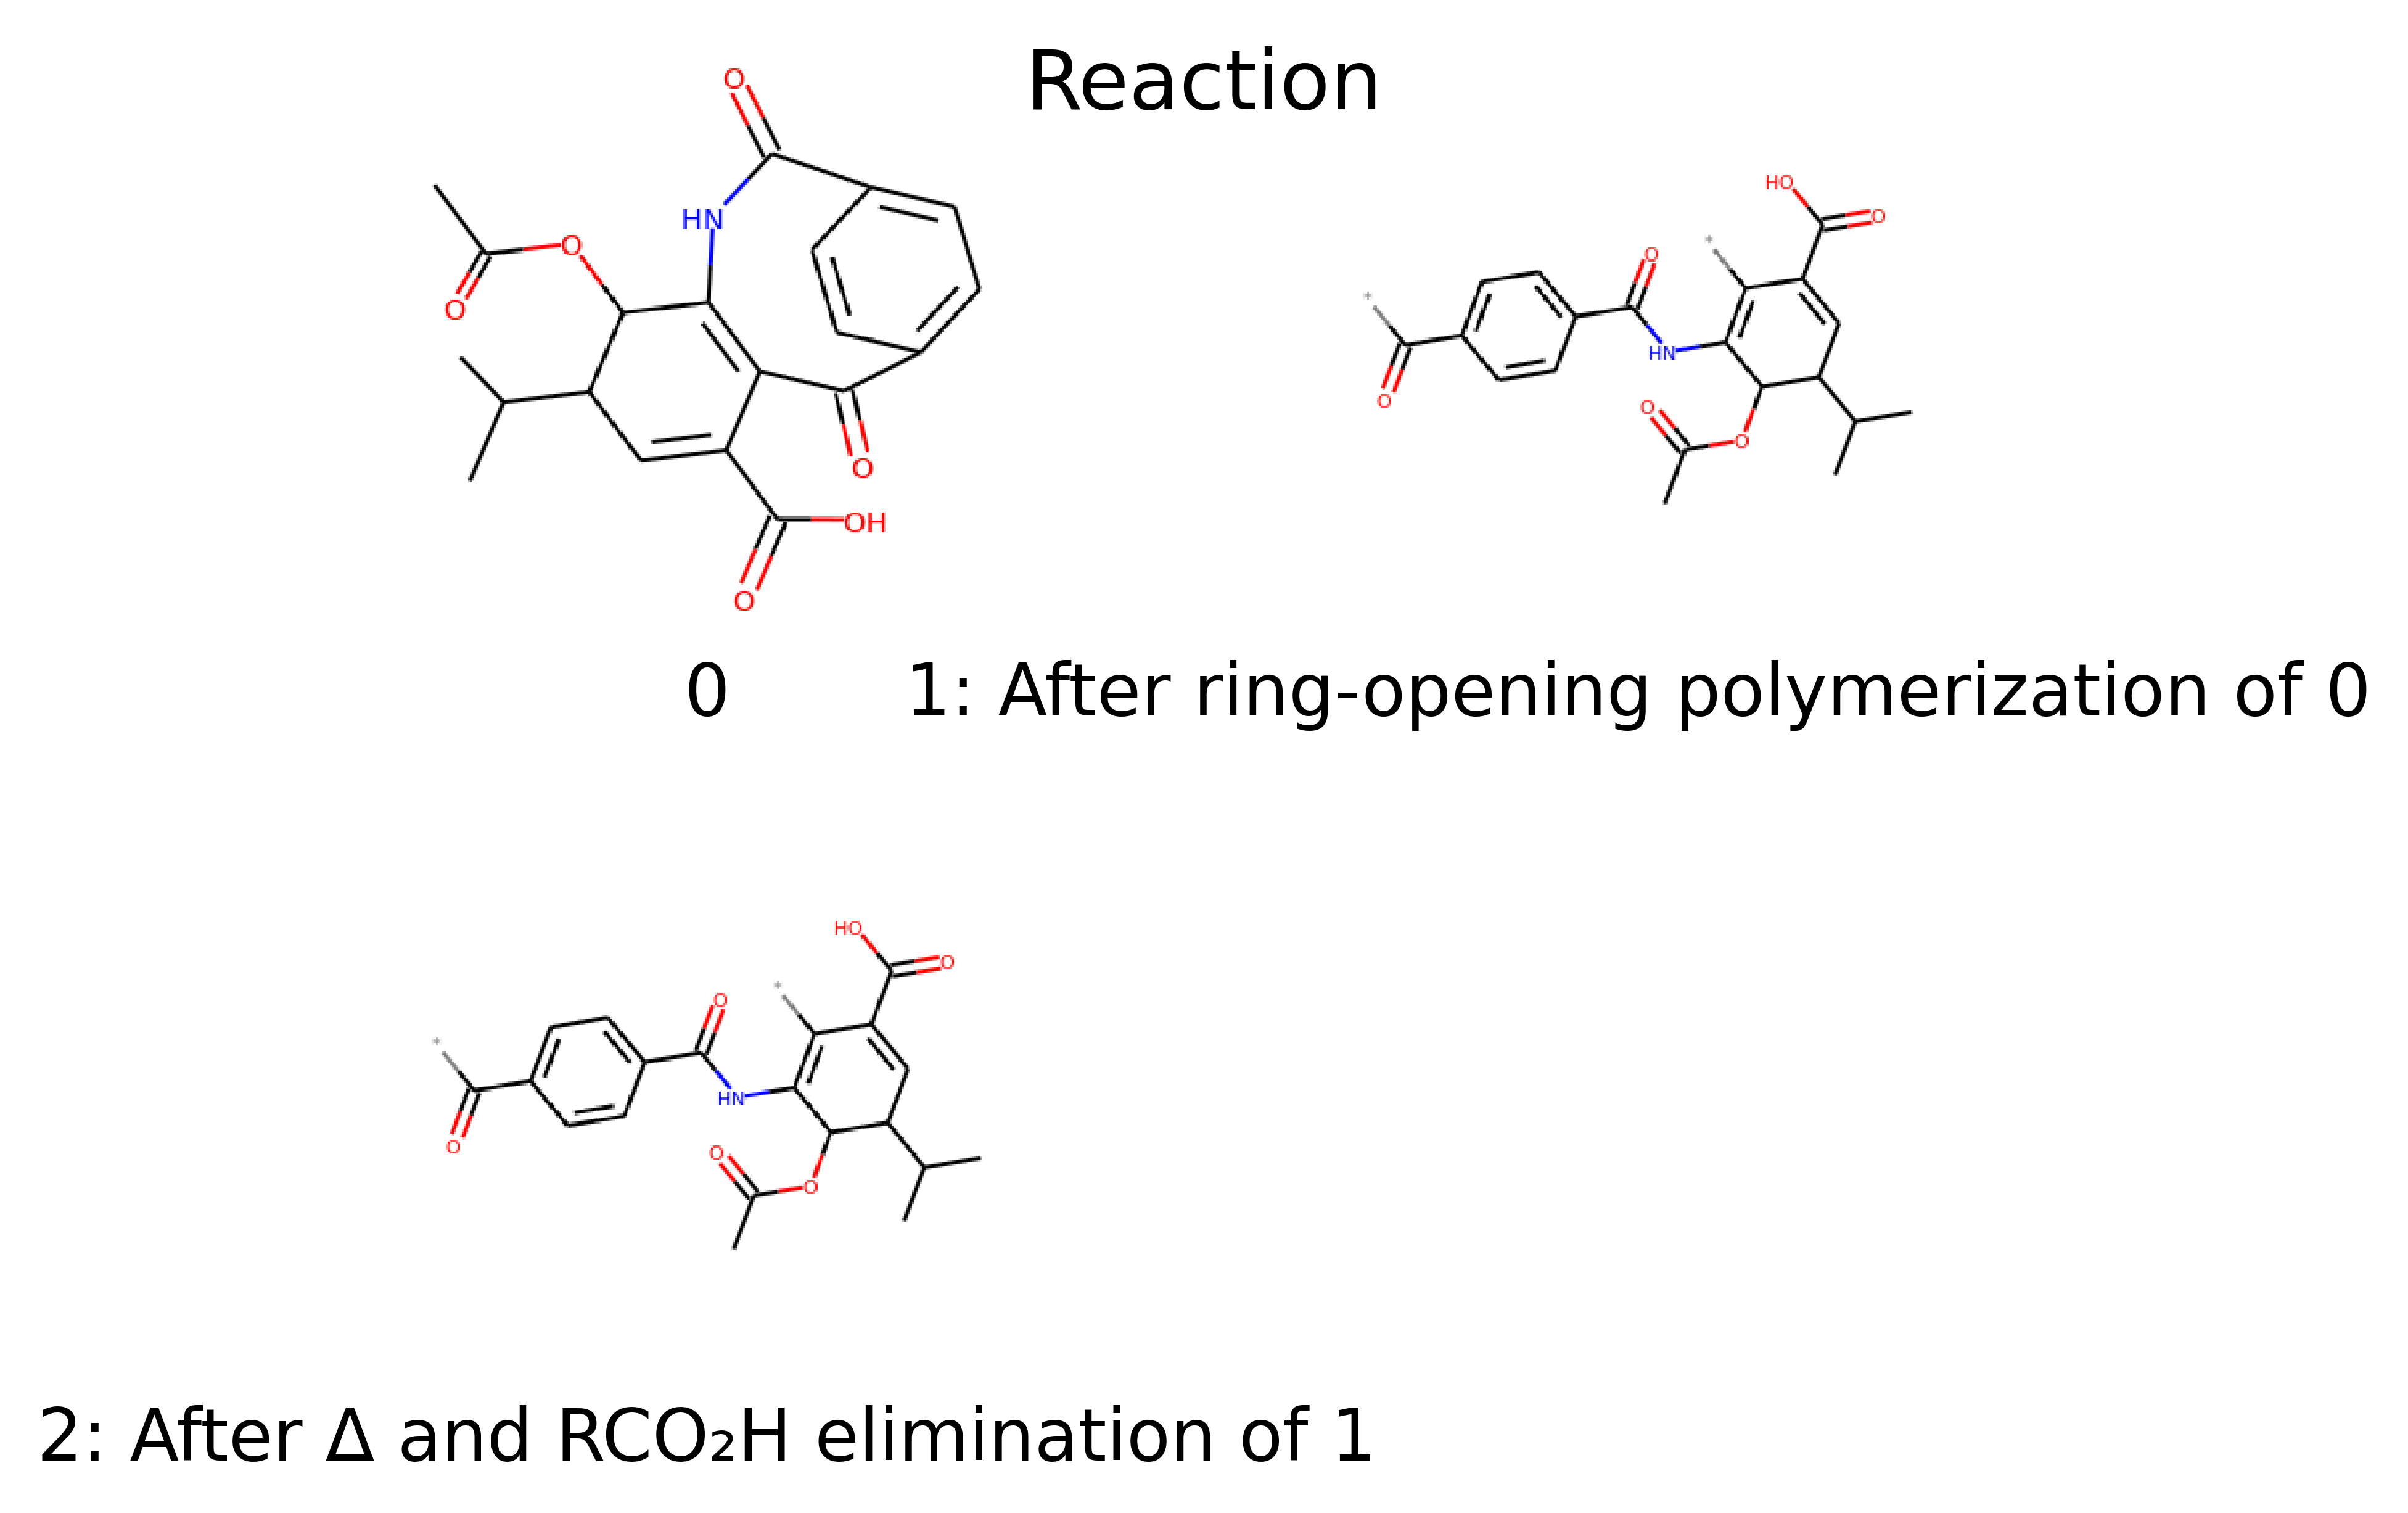

In [68]:
out[2].DrawSteps()

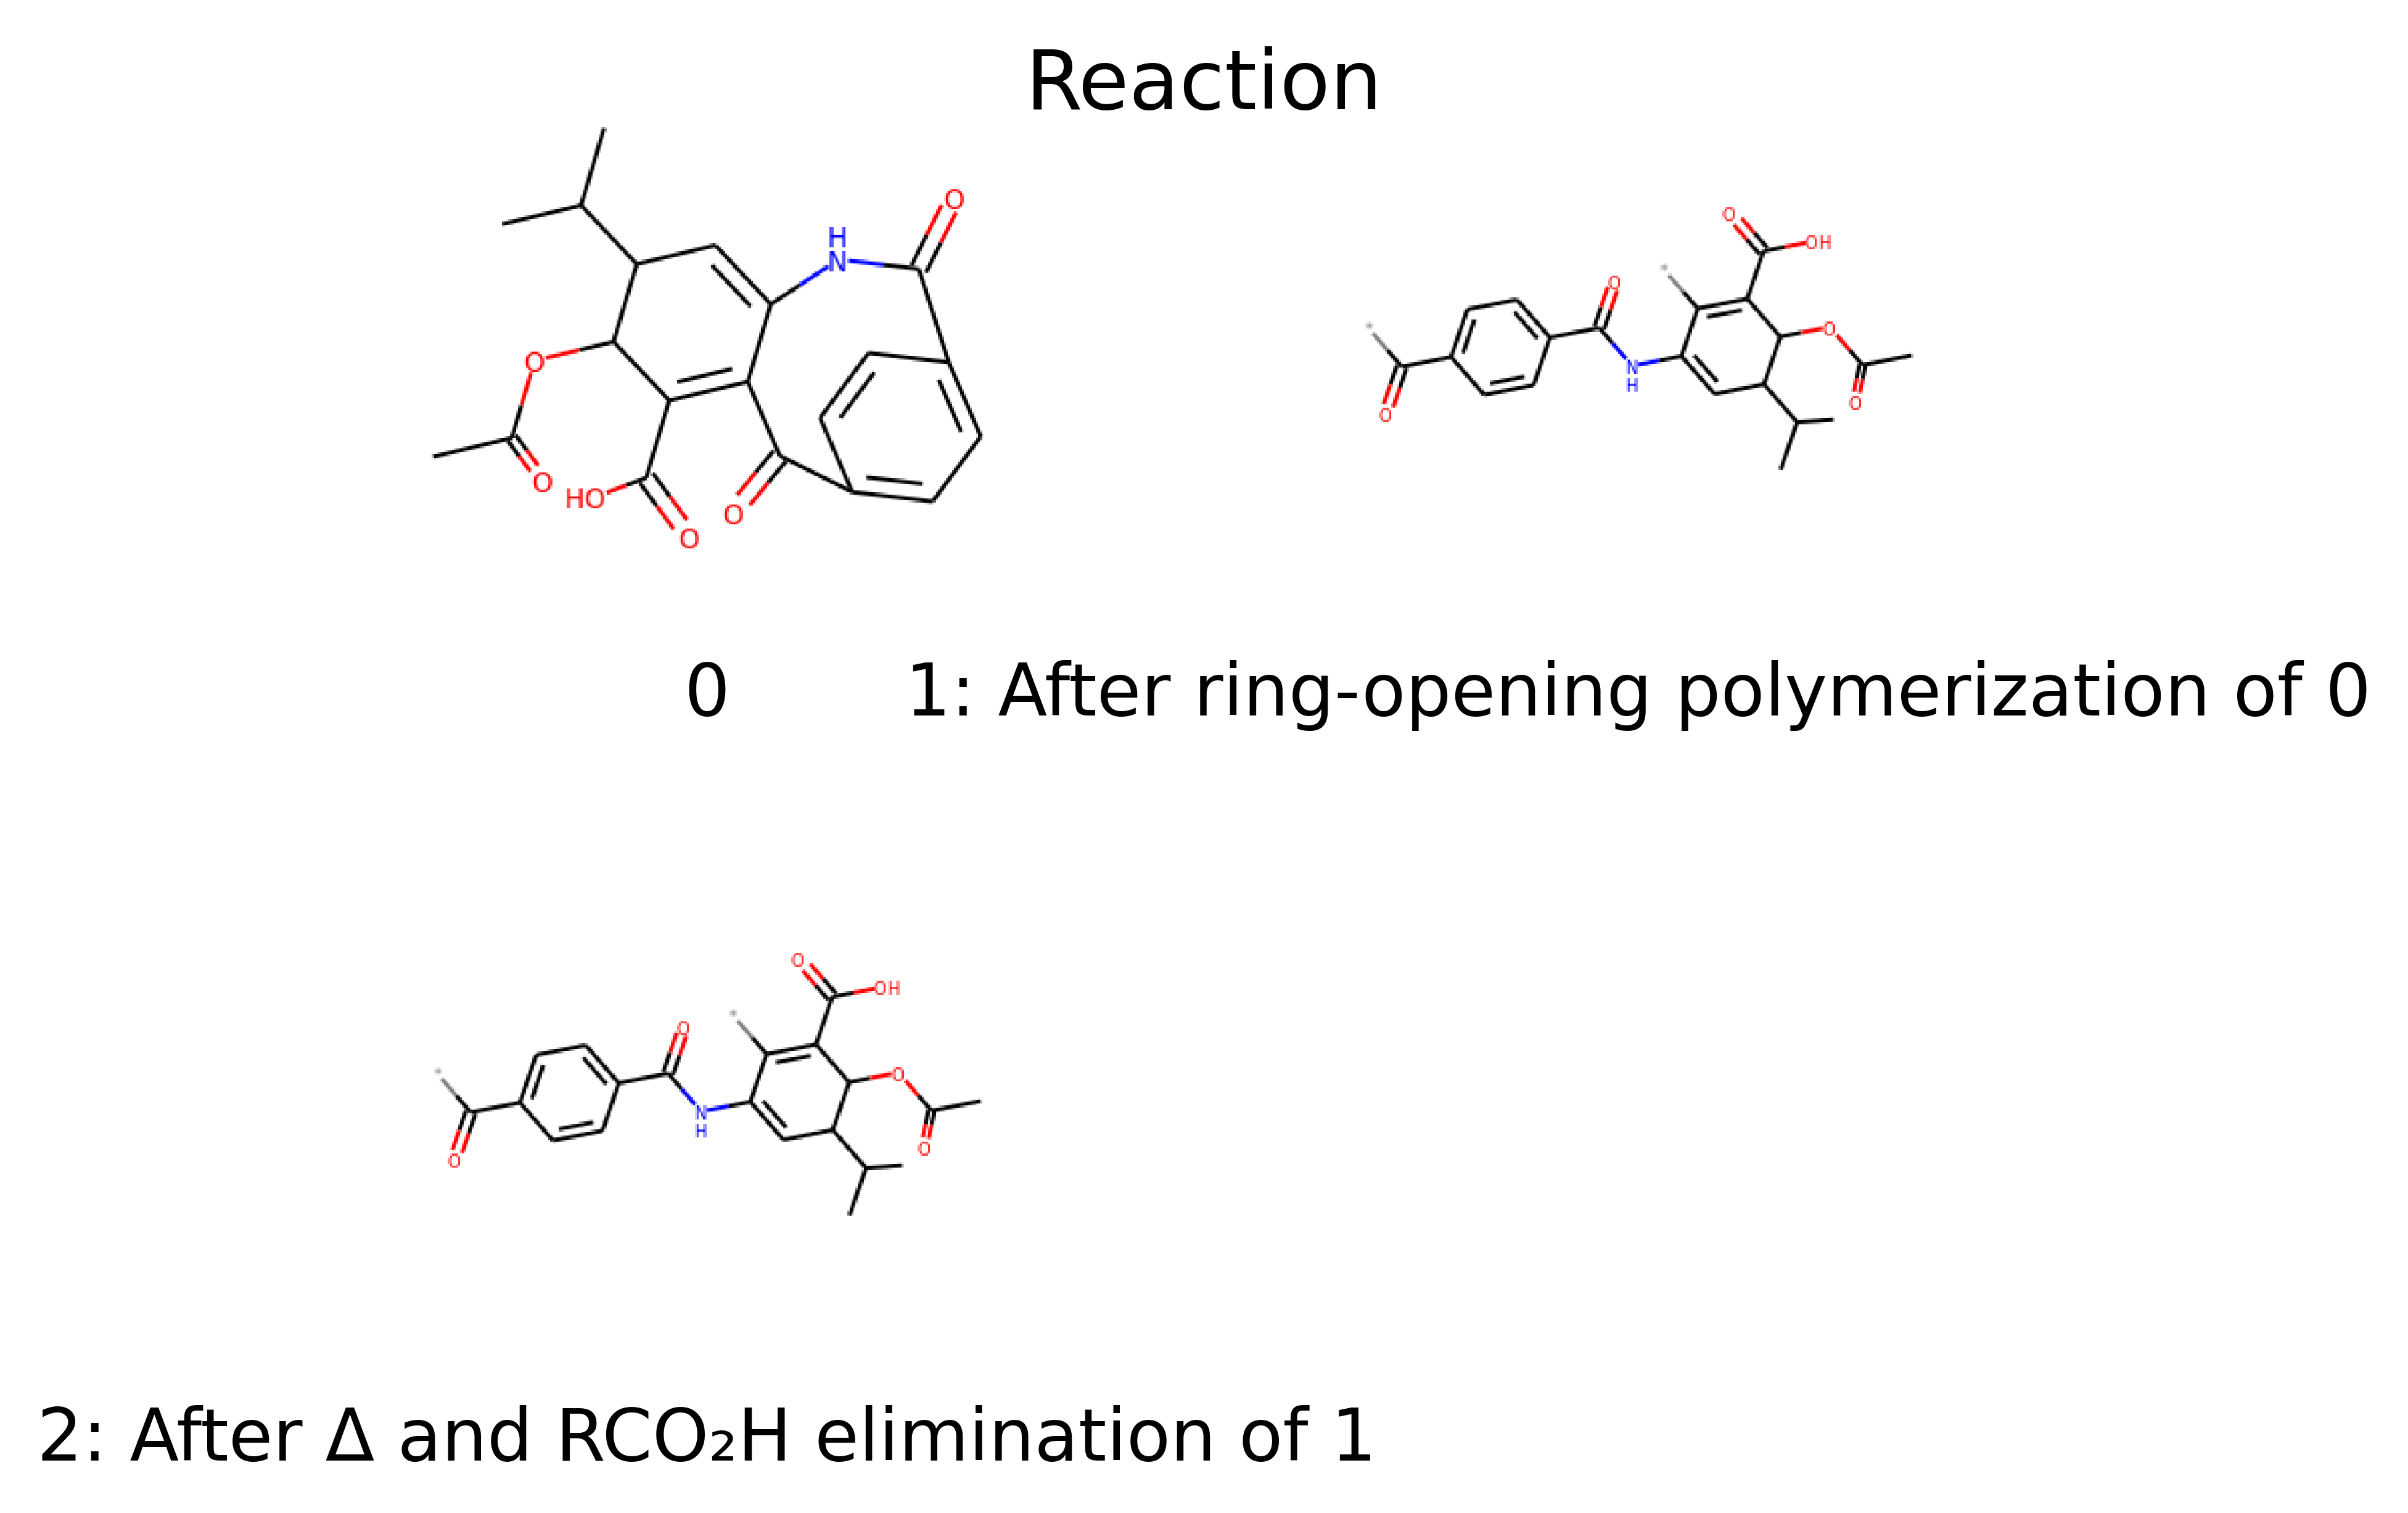

In [69]:
out[3].DrawSteps()

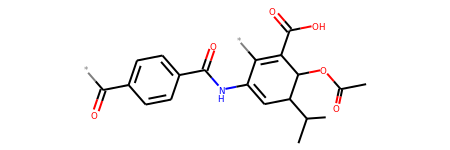

In [74]:
Chem.MolFromSmiles(out[3].lp_smiles)

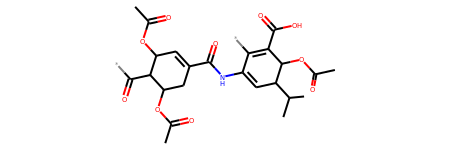

In [77]:
retro.elim_retro(out[3].lp_smiles,'RCO2H')[7]

In [78]:
out[3].lp_smiles

'*C(=O)c1ccc(C(=O)NC2=CC(C(C)C)C(OC(C)=O)C(C(=O)O)=C2*)cc1'

In [85]:
importlib.reload(retro)
importlib.reload(ru)
out = retro.retrosynthesize(['*C(=O)c1ccc(C(=O)NC2=CC(C(C)C)C(OC(C)=O)C(C(=O)O)=C2*)cc1'],n_core=1,hydrogenate_chain=False,debug=False)

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
#######
*C(=O)c1ccc(C(=O)NC2=CC(C(C)C)C(OC(C)=O)C(C(=O)O)=C2*)cc1
Exlude rxns: ['hydrogenate_chain']
<function ring_close_retro at 0x7f2200f3edd0>

inner_RxnPaths len: 0
<function func_chain_retro at 0x7f2200d31290>

inner_RxnPaths len: 0
<function elim_retro at 0x7f2200d31cb0>

elim_group: RCO2H
elim_group: HCl
inner_RxnPaths len: 13
sm_RxnPaths len: 14


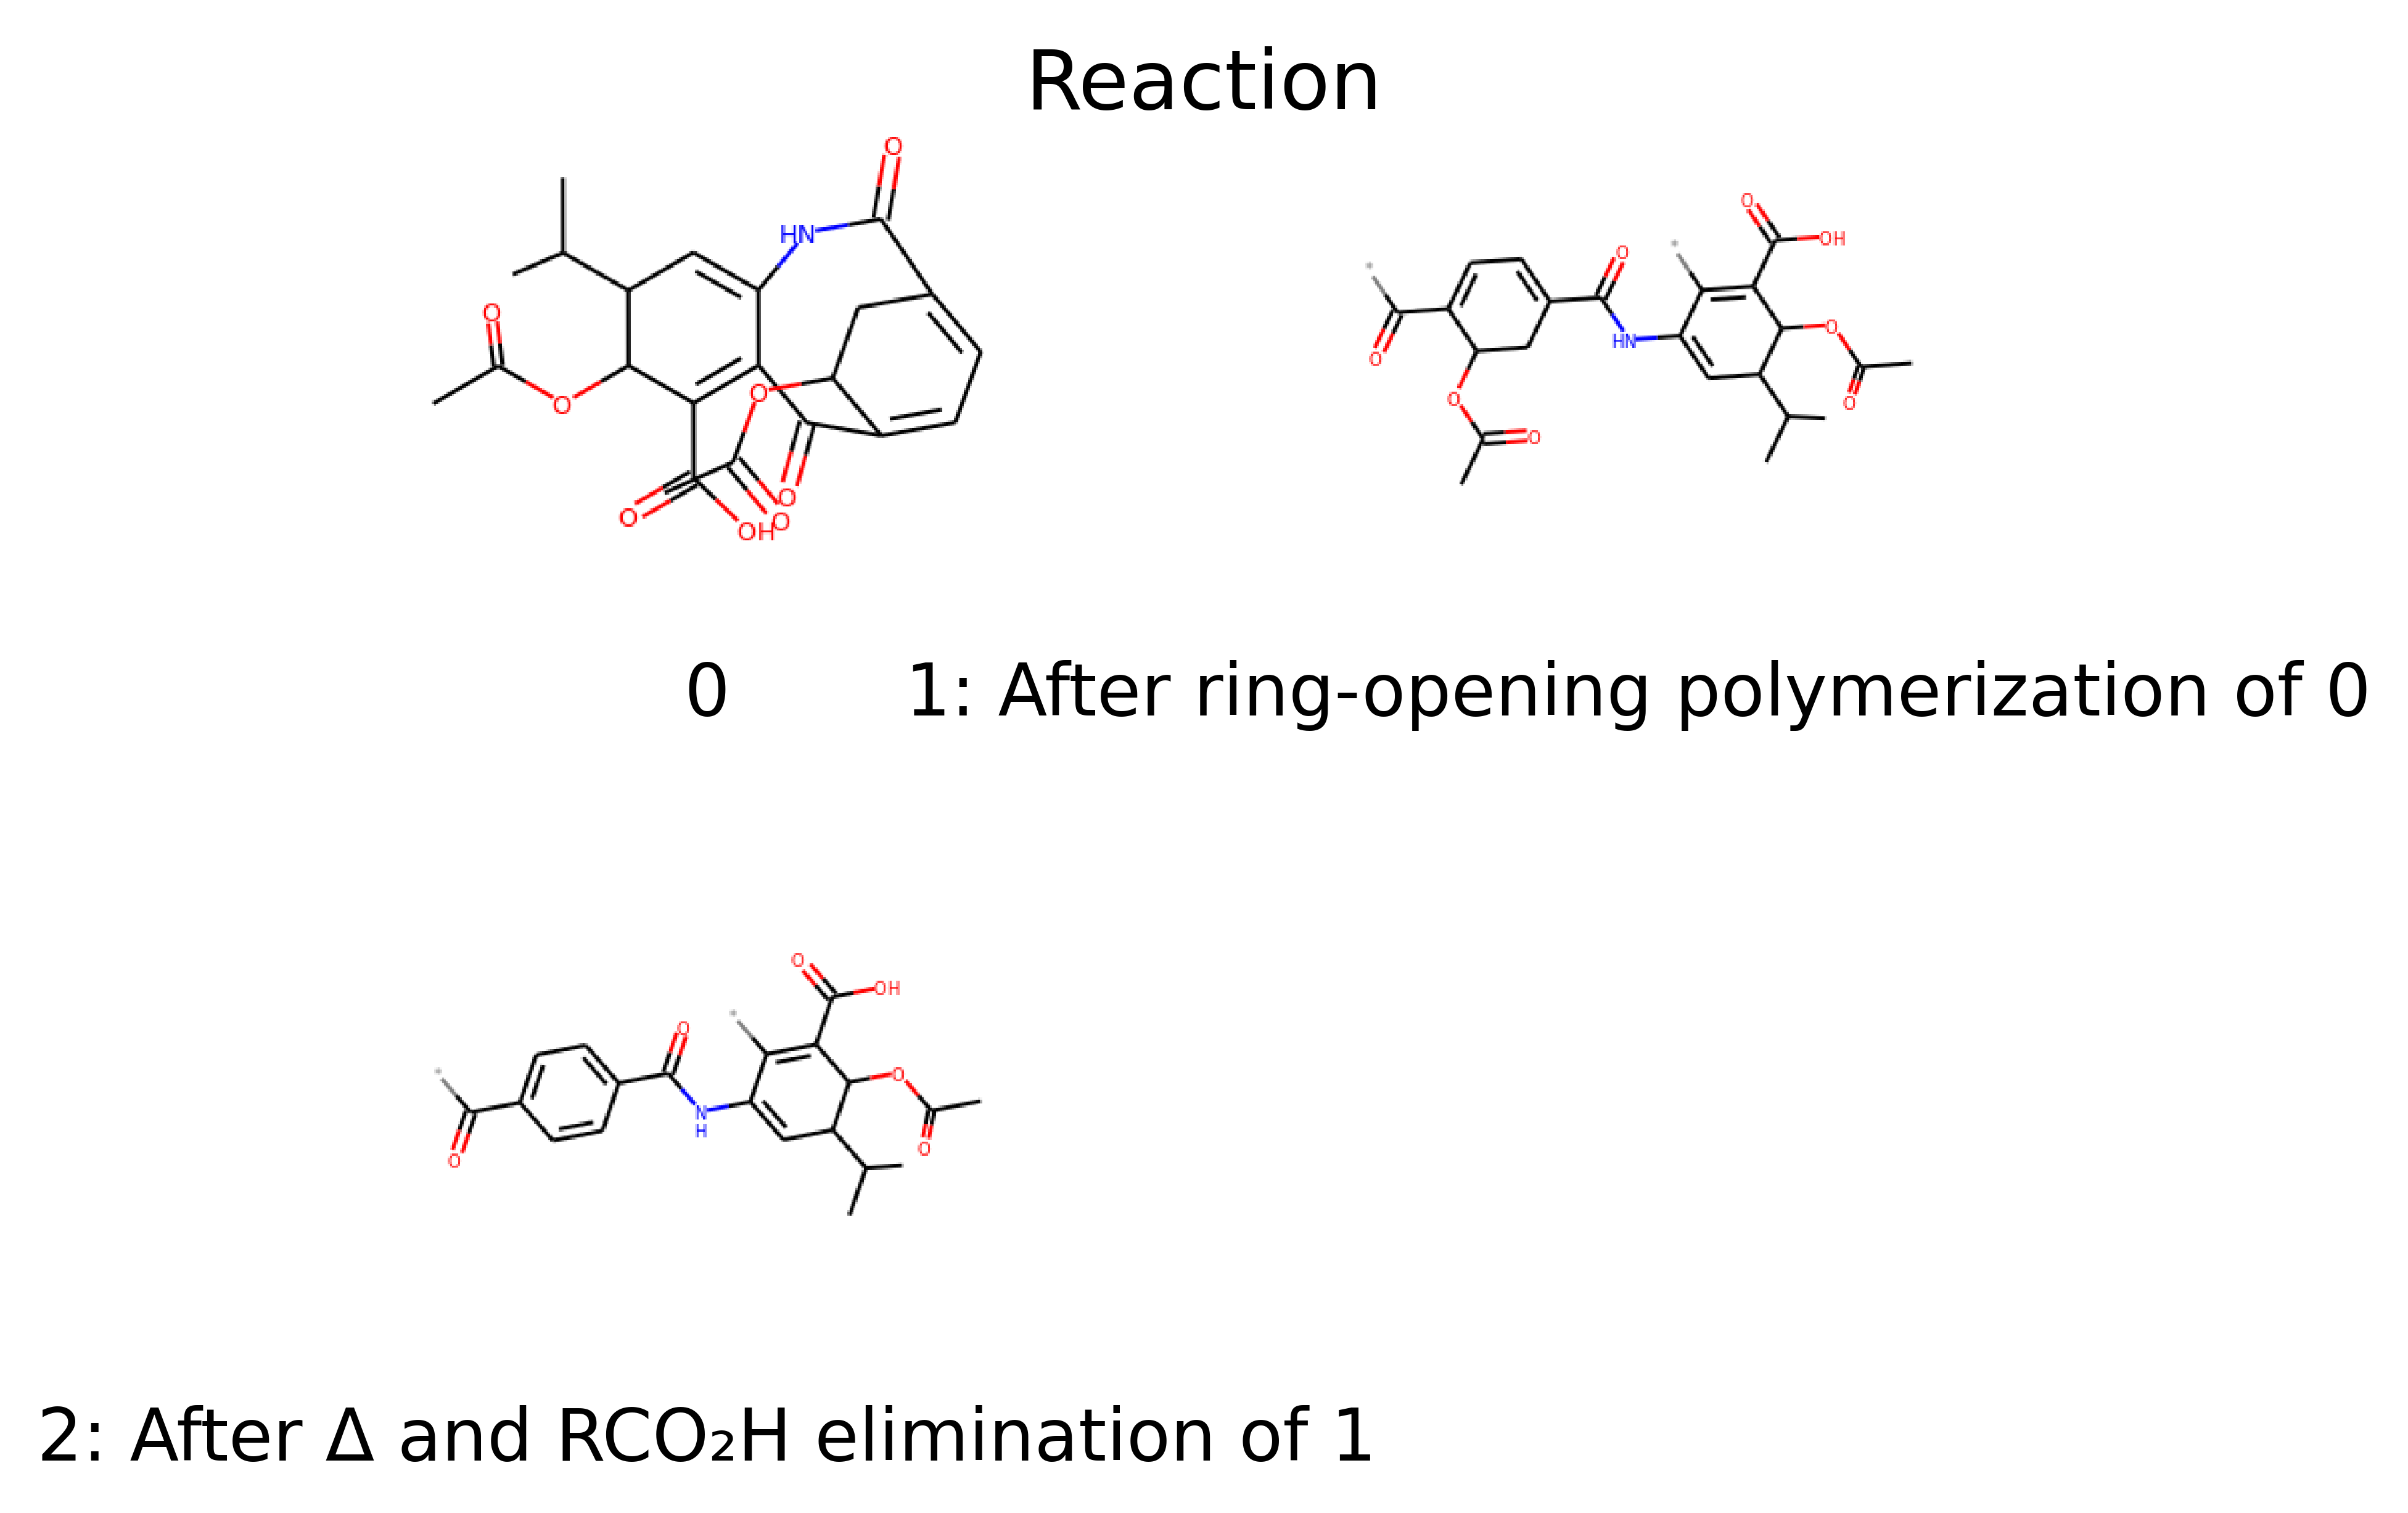

In [86]:
out[4].DrawSteps()

# Test aldean = ALDehydes + Alpha-Effect Nucleophiles

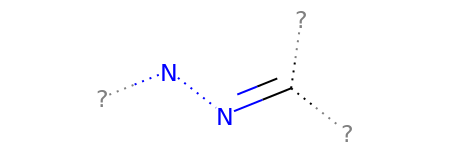

In [19]:
patt = Chem.MolFromSmarts('[*;R0,R1,R2][NHR0][NH0R0]=[CR0]([*;R0,R1,R2])[*;R0,R1,R2]') #when R != H
patt

In [23]:
patt2 = Chem.MolFromSmarts('[*;R0,R1,R2][NHR0][NH0R0]=[CR0][*;R0,R1,R2]') #when R = H

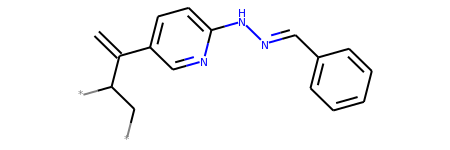

In [9]:
mol = Chem.MolFromSmiles('*CC(*)C(=C)c2ccc(N/N=C/c1ccccc1)nc2')
mol

In [41]:
rxn = Chem.AllChem.ReactionFromSmarts('[*;R0,R1,R2:0][NHR0:1][NH0R0:2]=[CR0:3]([*;R0,R1,R2:4])[*;R0,R1,R2:5]>>[*:4][C:3](=O)[*:5].[NH2:2][NH:1][*:0]')

In [6]:
rxn.RunReactants((mol,))

()

In [21]:
mol.HasSubstructMatch(patt) #should be False

False

In [24]:
mol.HasSubstructMatch(patt2) #should be True

True

In [29]:
rxn2 = Chem.AllChem.ReactionFromSmarts('[*;R0,R1,R2:0][NHR0:1][NH0R0:2]=[CR0:3][*;R0,R1,R2:5]>>[C:3](=O)[*:5].[NH2:2][NH:1][*:0]')

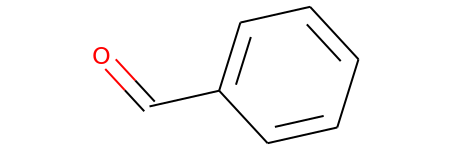

In [32]:
out = rxn.RunReactants((mol,))
out[0][0]

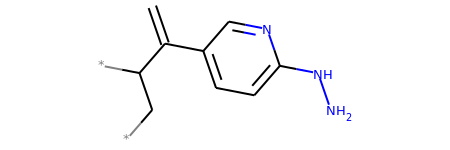

In [33]:
out[0][1]

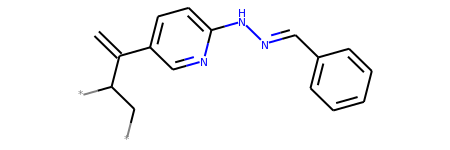

In [34]:
mol

In [35]:
len(out)

1

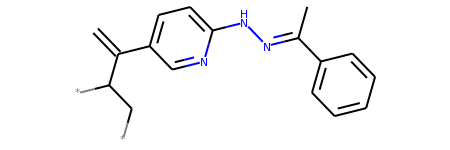

In [36]:
mol2 = Chem.MolFromSmiles('*CC(*)C(=C)c2ccc(N/N=C(C)/c1ccccc1)nc2')
mol2

In [42]:
out = rxn.RunReactants((mol2,))
out

((<rdkit.Chem.rdchem.Mol at 0x7f4508d7ae10>,
  <rdkit.Chem.rdchem.Mol at 0x7f4508d7aab0>),
 (<rdkit.Chem.rdchem.Mol at 0x7f4508d80090>,
  <rdkit.Chem.rdchem.Mol at 0x7f4508d800f0>))

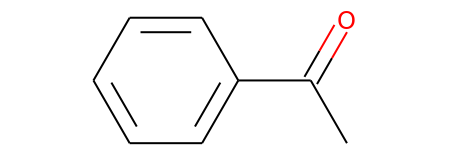

In [43]:
out[0][0]

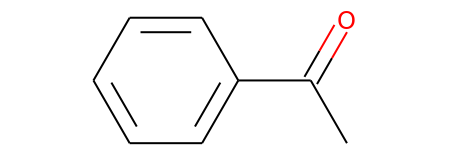

In [44]:
out[1][0]

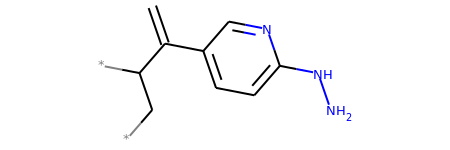

In [45]:
out[1][1]

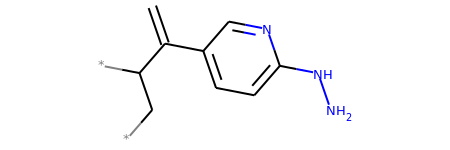

In [46]:
out[0][1]

In [50]:
import time
start = time.time()
out = rxn.RunReactants((mol,))
end = time.time()
print(end-start)
out

0.00031065940856933594


()

In [51]:
start = time.time()
mol.HasSubstructMatch(patt)
end = time.time()
print(end-start)

0.0003039836883544922


0.0017595291137695312


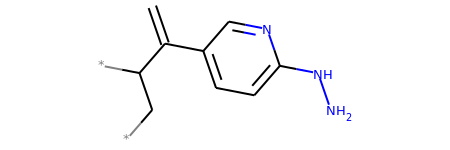

In [67]:
import retro_postpolymerization as post
importlib.reload(post)
start = time.time()
lp = ru.LinearPol(mol)
out = post.func_chain_retro(lp,'aldean')
end = time.time()
print(end-start)
out[0]

# Make thiol-ene

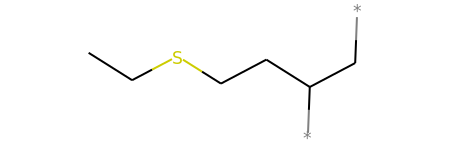

In [69]:
mol = Chem.MolFromSmiles('*CC(*)CCSCC')
mol

In [78]:
smart = '[*;R0:1][Sv2:2][CH2:3][CH2:4][*;R0,R1,R2:5]>>[CH2:3]=[CH:4][*:5].[*:1][SH:2]'

In [79]:
rxn = Chem.AllChem.ReactionFromSmarts(smart)

In [80]:
out = rxn.RunReactants((mol,))
out

((<rdkit.Chem.rdchem.Mol at 0x7f4507f63c90>,
  <rdkit.Chem.rdchem.Mol at 0x7f4507f5d8d0>),)

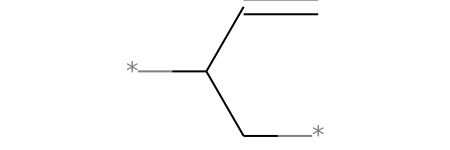

In [81]:
out[0][0]

# Test thiol-ene

0.0011811256408691406


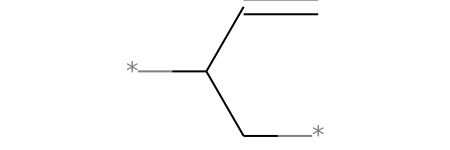

In [83]:
import retro_postpolymerization as post
importlib.reload(post)
start = time.time()
lp = ru.LinearPol(mol)
out = post.func_chain_retro(lp,'thiol-ene')
end = time.time()
print(end-start)
out[0]

# Make azal = Azide + alkyne

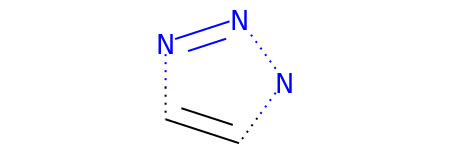

In [86]:
Chem.MolFromSmarts('N1N=NC=C1')

In [134]:
smart = '[*:6][#7:1]1:[#6:4]:[#6:5]:[#7:2]:[#7:3]:1>>[C:4]#[C:5].[*:6][N:1]=[NX2+:2]=[NX1-:3]'

In [135]:
rxn = Chem.AllChem.ReactionFromSmarts(smart)

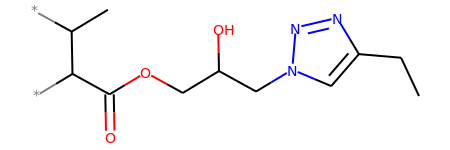

In [136]:
mol = Chem.MolFromSmiles('*C(C)C(*)C(=O)OCC(O)Cn1cc(CC)nn1')
mol

In [137]:
out = rxn.RunReactants((mol,))
out

((<rdkit.Chem.rdchem.Mol at 0x7f4508aebc30>,
  <rdkit.Chem.rdchem.Mol at 0x7f4508aebe70>),)

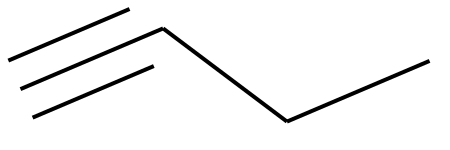

In [139]:
out[0][0]

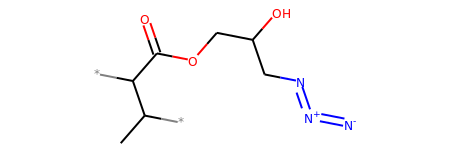

In [140]:
out[0][1]

In [102]:
Chem.MolToSmarts(mol)

'[#0]-[#6](-[#6])-[#6](-[#0])-[#6](=[#8])-[#8]-[#6]-[#6](-[#8])-[#6]-[#7]1:[#6]:[#6](-[#6]-[#6]):[#7]:[#7]:1'

In [103]:
mol.HasSubstructMatch(Chem.MolFromSmarts('[#7]1:[#6]:[#6]:[#7]:[#7]:1'))

True

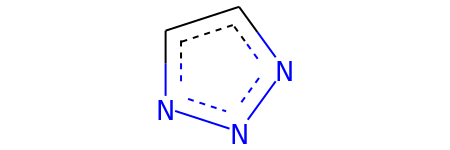

In [104]:
Chem.MolFromSmarts('[#7]1:[#6]:[#6]:[#7]:[#7]:1')

# Test azal

0.001482248306274414


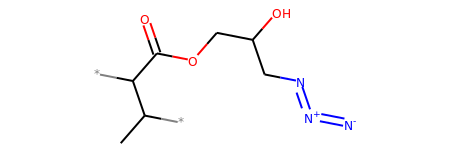

In [142]:
import retro_postpolymerization as post
importlib.reload(post)
start = time.time()
lp = ru.LinearPol(mol)
out = post.func_chain_retro(lp,'azal')
end = time.time()
print(end-start)
out[0]